<a href="https://colab.research.google.com/github/natashanuto/CEE2/blob/main/trabalho_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Final: Parte 1
Nome: Natasha Nuto

Matrícula: 232014852

##Introdução

O relatório tem como objetivo analisar dois tipos de simulação de investimento: _investimento único_ e _investimento recorrente_. Para isto, utiliza-se a taxa __SELIC__ (Sistema Especial de Liquidação e Custódia), que representa a taxa básica de juros da economia brasileira e é o principal instrumento de política monetária do Banco Central do Brasil.

Os dados foram coletados diretamente da API do Banco Central, referentes ao mês de setembro de 2023. A partir deles, são calculadas taxas derivadas da SELIC, como a taxa anual e a taxa acumulada, para posterior realização das simulações de investimento mencionadas.


## Coleta de dados

Conforme mencionado, os dados da taxa SELIC foram obtidos diretamente da API do Banco Central, com as datas parametrizadas para o período de 01/09/2023 a 30/09/2023. A API está disponível no link:

In [31]:
import requests
import pandas as pd


data_inicial = "01/09/2023"
data_final = "30/09/2023"
url = f"https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json&dataInicial={data_inicial}&dataFinal={data_final}"

response = requests.get(url)

if response.status_code == 200:
  taxa = response.json()

  df = pd.DataFrame(taxa)

else:
  print("Erro ao acessar API do Banco Central.")


## Taxa Anual (%)

A seguir, calcula-se a __taxa anual__ equivalente da SELIC a partir da taxa diária, utilizando a fórmula de juros compostos para dias úteis:

$$T_{anual} = (1 + T_{diária})^{252} - 1 $$

em que:

* $T_{diária}$ é a taxa diária expressa em valor decimal (ex: 0.05% = 0.0005);
* O número 252 representa a quantidade aproximada de dias úteis no ano (convenção do mercado financeiro).

In [32]:
df["valor"] = pd.to_numeric(df["valor"]) / 100
df["SELIC Anual (%)"] = round(((1 + df["valor"])**252 - 1) * 100, 2)
df["SELIC Diária (%)"] = df["valor"] * 100

## Taxa SELIC Acumulada (%)

A Taxa SELIC __Acumulada__ representa o rendimento percentual composto ao longo de todos os dias úteis do período analisado. Seu cálculo é realizado através da seguinte fórmula:

$$T_{acumulada} = \prod (1 + T_{diária}) - 1 $$

In [33]:
df["SELIC Acumulada (%)"] = round((((1 + df["valor"]).cumprod()) - 1) * 100, 6)

## Taxas SELIC (%)

Segue, portanto, os resultados consolidados das taxas SELIC para setembro de 2023, calculadas diariamente conforme a metodologia descrita anteriormente:

| Datas      |   | SELIC Diária (%) | SELIC Anual (%) | SELIC Acumulada (%) |
|------------|---|------------------|-----------------|---------------------|
| 01/09/2023 |   | 0.049037         | 13.15           | 0.049037            |
| 04/09/2023 |   | 0.049037         | 13.15           | 0.098098            |
| 05/09/2023 |   | 0.049037         | 13.15           | 0.147183            |
| 06/09/2023 |   | 0.049037         | 13.15           | 0.196292            |
| 08/09/2023 |   | 0.049037         | 13.15           | 0.245426            |
| 11/09/2023 |   | 0.049037         | 13.15           | 0.294583            |
| 12/09/2023 |   | 0.049037         | 13.15           | 0.343764            |
| 13/09/2023 |   | 0.049037         | 13.15           | 0.392970            |
| 14/09/2023 |   | 0.049037         | 13.15           | 0.442200            |
| 15/09/2023 |   | 0.049037         | 13.15           | 0.491453            |
| 18/09/2023 |   | 0.049037         | 13.15           | 0.540731            |
| 19/09/2023 |   | 0.049037         | 13.15           | 0.590034            |
| 20/09/2023 |   | 0.049037         | 13.15           | 0.639360            |
| 21/09/2023 |   | 0.047279         | 12.65           | 0.686941            |
| 22/09/2023 |   | 0.047279         | 12.65           | 0.734545            |
| 25/09/2023 |   | 0.047279         | 12.65           | 0.782171            |
| 26/09/2023 |   | 0.047279         | 12.65           | 0.829820            |
| 27/09/2023 |   | 0.047279         | 12.65           | 0.877491            |
| 28/09/2023 |   | 0.047279         | 12.65           | 0.925185            |
| 29/09/2023 |   | 0.047279         | 12.65           | 0.972902            |

## Visualização Temporal das Taxas

Para melhor compreensão do comportamento das taxas SELIC durante o período analisado, observa-se abaixo três gráficos de séries temporais:

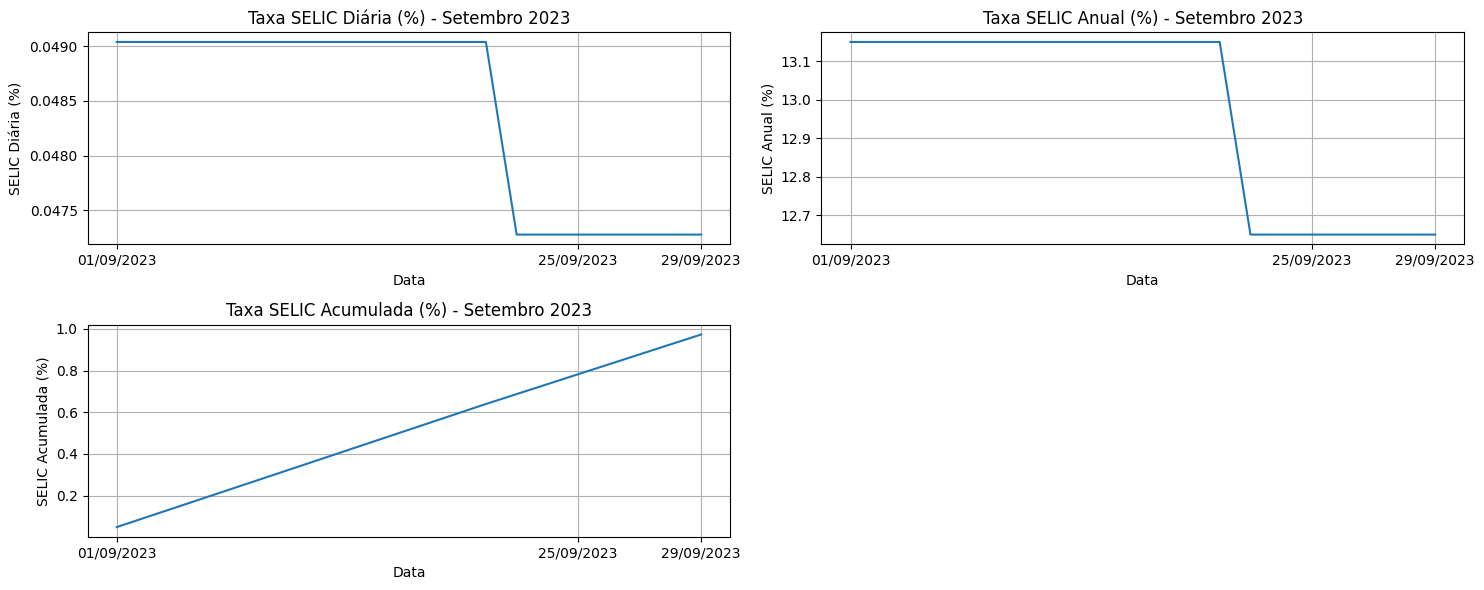

In [46]:
plt.figure(figsize=(15, 6))

#SELIC Diária (%)

plt.subplot(2, 2, 1)
plt.plot(df["data"], df["SELIC Diária (%)"])
plt.title("Taxa SELIC Diária (%) - Setembro 2023")
plt.xlabel("Data")
plt.ylabel("SELIC Diária (%)")
plt.grid(True)
plt.xticks([df['data'].iloc[0], df['data'].iloc[15], df['data'].iloc[-1]])


#SELIC Anual (%)

plt.subplot(2, 2, 2)
plt.plot(df["data"], df["SELIC Anual (%)"])
plt.title("Taxa SELIC Anual (%) - Setembro 2023")
plt.xlabel("Data")
plt.ylabel("SELIC Anual (%)")
plt.grid(True)
plt.xticks([df['data'].iloc[0], df['data'].iloc[15], df['data'].iloc[-1]])

#SELIC Acumulada (%)

plt.subplot(2, 2, 3)
plt.plot(df["data"], df["SELIC Acumulada (%)"])
plt.title("Taxa SELIC Acumulada (%) - Setembro 2023")
plt.xlabel("Data")
plt.ylabel("SELIC Acumulada (%)")
plt.grid(True)
plt.xticks([df['data'].iloc[0], df['data'].iloc[15], df['data'].iloc[-1]])



plt.tight_layout()
plt.show()

## Taxa SELIC Anual - Maior e Menor

Em seguida, utilizou-se um código para obtenção dos períodos com as taxas de juros (anuais) mais altas e mais baixas. Assim, obteve-se as seguintes saídas:


* `O período com a maior taxa de juros anual foi entre 01/09/2023 e 20/09/2023, no qual a taxa foi de 13.15%.`
* `O período com a menor taxa de juros anual foi entre 21/09/2023 e 29/09/2023, no qual a taxa foi de 12.65%.`

In [35]:
maior = df[df["SELIC Anual (%)"] == max(df["SELIC Anual (%)"])]
menor = df[df["SELIC Anual (%)"] == min(df["SELIC Anual (%)"])]


print("O período com a maior taxa de juros anual foi entre " + maior["data"].iloc[0] + " e " + maior["data"].iloc[-1] + ", no qual a taxa foi de " + str(max(df["SELIC Anual (%)"])) + "%.")
print("O período com a menor taxa de juros anual foi entre " + menor["data"].iloc[0] + " e " + menor["data"].iloc[-1] + ", no qual a taxa foi de " + str(min(df["SELIC Anual (%)"])) + "%.")

O período com a maior taxa de juros anual foi entre 01/09/2023 e 20/09/2023, no qual a taxa foi de 13.15%.
O período com a menor taxa de juros anual foi entre 21/09/2023 e 29/09/2023, no qual a taxa foi de 12.65%.


## Simulação de investimento único

Nesta seção, apresenta-se o resultado da _Simulação de investimento único_ , em que um aporte de 10.000 reais foi aplicado a 100% da taxa SELIC diária durante o período com maior taxa de juros anual, do dia 01/09/2023 a 20/09/2023, com base nos resultados obtidos anteriormente. O valor e o período foram parametizados no código.

A fórmula utilizada foi:


O resultado do investimento foi:

In [36]:
valor = 5000
periodo = pd.date_range(start = "01/09/2023", end = "20/09/2023", freq = "D")

##  Simulação de investimento recorrente

Por fim, realiza-se uma _Simulação de investimento recorrente_com aportes diários constantes, no valor de 200 reais, aplicados a 100% da taxa SELIC diária, durante o período de menor taxa de juros anual, do dia 21/09/2023 a 29/09/2023, com base nos resultados obtidos anteriormente. O rendimento foi calculado com base no regime de capitalização composta, ou seja, cada aporte deve render de acordo com os dias úteis até o fim do período.

A fórmula utilizada foi:


O resultado do investimento foi:

In [37]:
valor2 = 100
periodo2 = pd.date_range(start = "21/09/2023", end = "29/09/2023", freq = "D")